In [8]:
## Load and Explore Data

In [10]:
pip install pandas scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df = pd.read_csv("Online Retail Data Set.csv", encoding="ISO-8859-1")


In [13]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.Collecting chardet




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import chardet

# Detect encoding
with open("Online Retail Data Set.csv", "rb") as file:
    result = chardet.detect(file.read())
    print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [17]:
with open("Online Retail Data Set.csv", encoding="utf-8", errors="ignore") as file:
    df = pd.read_csv(file)


In [20]:
df = pd.read_csv("Online Retail Data Set.csv", encoding="ISO-8859-1")


In [21]:
df = pd.read_csv("Online Retail Data Set.csv", encoding=result['encoding'])


In [22]:
pip install charset-normalizer


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from charset_normalizer import from_path

result = from_path("Online Retail Data Set.csv").best()
print(result.encoding)


cp1250


In [25]:
with open("Online Retail Data Set.csv", encoding="utf-8", errors="ignore") as file:
    df = pd.read_csv(file)


In [27]:
df = pd.read_csv("Online Retail Data Set.csv", encoding=result.encoding)


In [31]:
# Ensure the column names are correct
print(df.columns)

# Calculate 'TotalSpent' if necessary
if 'TotalSpent' not in df.columns:
    df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

# Feature selection and scaling
features = df[['Quantity', 'UnitPrice', 'TotalSpent']]  # Example features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [35]:
# Ensure all columns are numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['Quantity', 'UnitPrice', 'TotalSpent'])

# Check for any remaining NaN values
print(df[['Quantity', 'UnitPrice', 'TotalSpent']].isna().sum())

# Group by CustomerID and compute the mean of the numeric columns
grouped = df.groupby('CustomerID').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalSpent': 'mean'
}).reset_index()

# Display the result
print(grouped.head())


Quantity      0
UnitPrice     0
TotalSpent    0
dtype: int64
   CustomerID   Quantity  UnitPrice  TotalSpent
0     12346.0   0.000000   1.040000    0.000000
1     12347.0  13.505495   2.644011   23.681319
2     12348.0  75.516129   5.764839   57.975484
3     12349.0   8.643836   8.289041   24.076027
4     12350.0  11.588235   3.841176   19.670588


   Cluster      Quantity    UnitPrice     TotalSpent  CustomerID
0        0      9.552913     4.054733      18.424761      406821
1        1 -77605.000000     1.560000 -122826.600000           2
2        2  74215.000000     1.040000   77183.600000           1
3        3     -0.806452  9730.436452   -7617.782258           4
4        4  80995.000000     2.080000  168469.600000           1


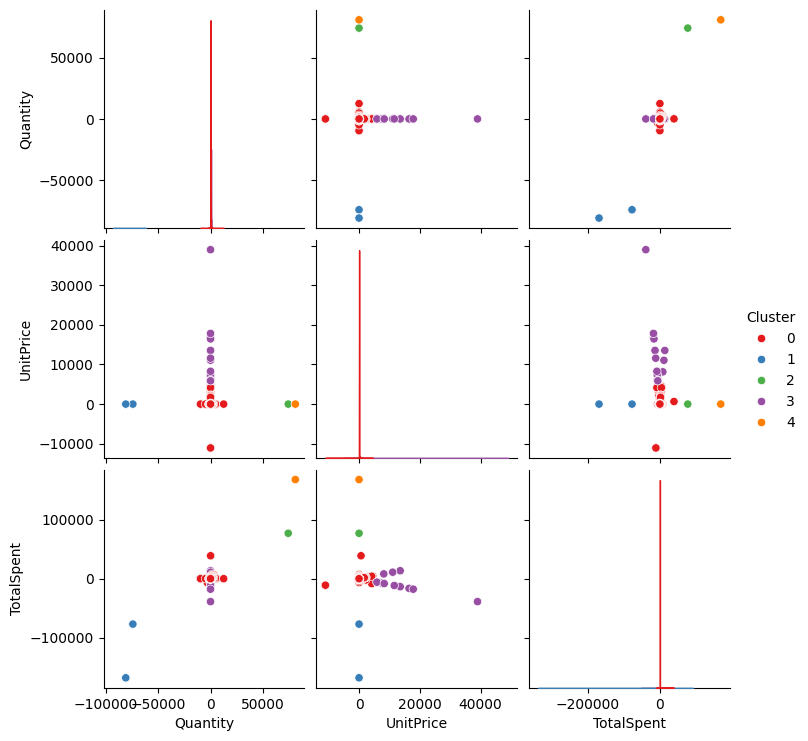

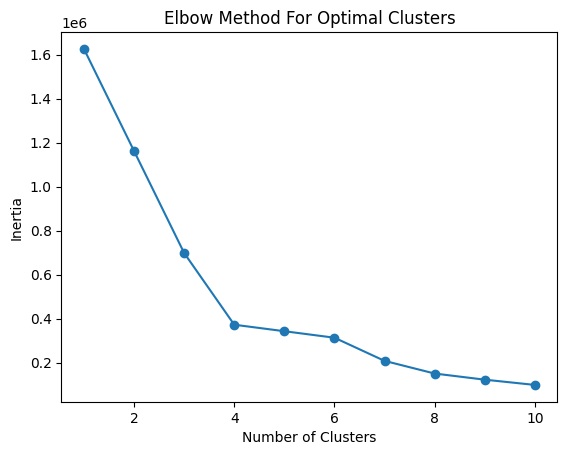

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 4: Feature selection and scaling
# Select the relevant features for clustering (after handling any missing values)
features = df[['Quantity', 'UnitPrice', 'TotalSpent']]

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply K-Means clustering
# Initialize the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the scaled features
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Evaluate clustering results
# Check how the data is grouped into clusters
cluster_summary = df.groupby('Cluster').agg({
    'Quantity': 'mean',
    'UnitPrice': 'mean',
    'TotalSpent': 'mean',
    'CustomerID': 'count'
}).reset_index()

# Display the cluster summary
print(cluster_summary)

# Step 7: Visualize the clustering results
# Visualizing the clusters using a pairplot (if more than 2 features, you might need PCA or t-SNE)
sns.pairplot(df[['Quantity', 'UnitPrice', 'TotalSpent', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()

# Step 8: (Optional) Visualize Elbow Method to find optimal clusters
# Elbow method for optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 9: Save the results
df.to_csv("Customer_Segmentation_Results.csv", index=False)
